<center><h1 style="color:#173F8A;"> Metodos para Ecuaciones Diferenciales, IMT3410, 2024-2 </h1></center>
<h3 style="color:#173F8A;text-align:right;"> Instituto de Ingenieria Matematica y Computacional<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br> </h3>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="250" height="400"><br><br><br><br><br>
</figure>
 -->

<h2 style="color:#03122E;text-align:center;"> Capitulo 1. Metodos para problemas de frontera<br> </h2>
<hr style="border:2px solid #03122E"> </hr>


## **Temas**
1. [Metodo de disparo, Ejemplo 1](#Metodo-de-disparo)
2. [Metodo de diferencias finitas](#Metodo-de-diferencias-finitas)


In [1]:
# Import libraries: 
# - numerical scientific computing NumPy
# - scientific computing
# - visualiazation in python
# - data analysis
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, HTML
from scipy.integrate import odeint
display(HTML("""<style>.output {display: flex;align-items: center;text-align: center;}</style>"""))

## Metodo de disparo

## Ejemplo 1:
\begin{alignat*}{4}
\frac{dy_1}{dx} & = y_2, &&\qquad y_1(0) = 0,\\
\frac{dy_2}{dx} & = -\exp(-y_1), &&\qquad y_2(0) = s,\\
\frac{dy_3}{dx} & = y_4, &&\qquad y_3(0) = 0,\\
\frac{dy_4}{dx} & = \exp(-y_1)y_3, &&\qquad y_4(0) = 1,
\end{alignat*}

In [2]:
def problem1(y,t):
    y1,y2,y3,y4 = y
    return np.array([y2, -np.exp(-y1), y4, np.exp(-y1)*y3])

In [3]:
tf = 1.0
t = np.linspace(0, tf, 101)

s = 1.0
SOLUTIONS = []
svals = [s]
for j in range(4):
    sol = odeint(problem1, y0=np.array([0,s,0,1.0]), t=t)
    SOLUTIONS.append(sol)
    # Newton update
    phis = sol[-1,0]
    phips = sol[-1,2]
    s  = s - phis/phips
    svals.append(s)

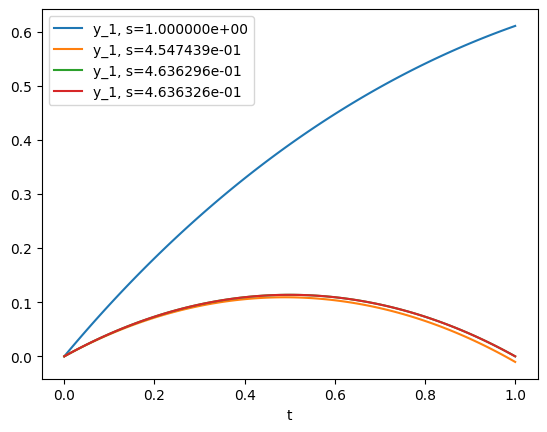

In [4]:
import matplotlib.pyplot as plt
for j in range(4):
    sol = SOLUTIONS[j]
    plt.plot(t, sol[:, 0], label='y_1, s=%e'%svals[j])
    plt.legend(loc='best')
    plt.xlabel('t')
    plt.grid()
plt.show()

## Metodo de diferencias finitas

Consideraremos el problema de Sturm-Liouville
$$
L (y) = r(x),\quad a\leq x\leq b, \qquad L(y):= -y'' + p(x)y' + q(x) y
$$
con condiciones de frontera simples
$$
y(a) = \alpha, \;y(b) = \beta.
$$
El m\'etodo de diferencias finitas que vimos en clases nos queda
\begin{align*}
(L_{h} u )_{n} & = -\frac{u_{n+1}-2u_{n}+u_{n-1}}{h^{2}} + p(x_{n}) \frac{u_{n+1}-u_{n-1}}{2h} + q(x_{n})u_{n} = r(x_n), \quad\text{para }n=1,2,...,N, \\
u_0 & = \alpha,\\
u_{N+1} &= \beta. 
\end{align*}

## Ejemplo 1

Considere $p = 0$, $q=0$, y $r = \pi^{2}\sin(\pi x)$. Con condiciones de frontera $\alpha = \beta= 0$. 




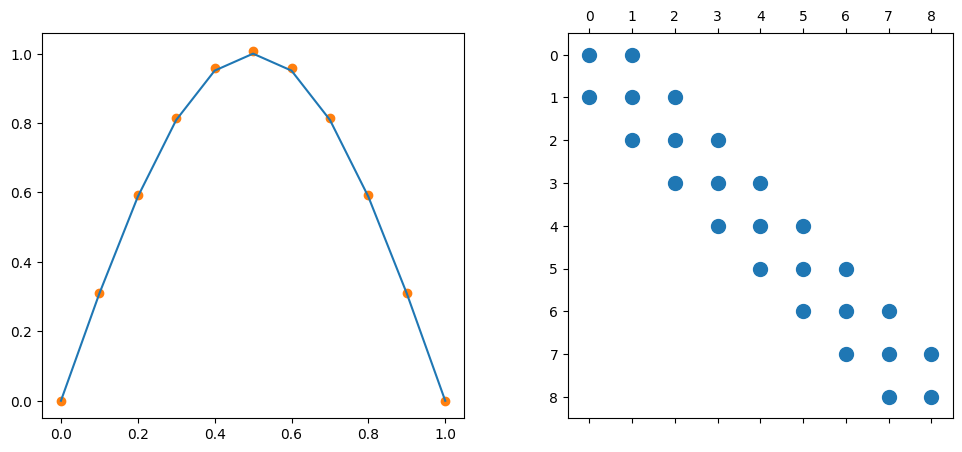

In [12]:
from numpy import pi, sin, cos
ufun1D = lambda x: sin(pi*x)
g1D = lambda x: ufun1D(x)
f1D = lambda x: (pi)**2*sin(pi*x)
nx = 10
lx = 1.0
x = np.linspace(0,lx,nx+1)
dx = lx/nx
A1D = np.diag(2.0*np.ones(nx-1)) + np.diag(-1.0*np.ones(nx-2),1)+ np.diag(-1.0*np.ones(nx-2),-1)
F1D = f1D(x[1:nx])
uhsol = np.zeros(nx+1)
uhsol[0] = g1D(x[0])
uhsol[nx] = g1D(x[nx])
uhsol[1:nx] = np.linalg.solve(A1D,dx**2*F1D)
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[1].spy(A1D,  marker='o')
ax[0].plot(x, uhsol,color='C01', marker='o', linestyle='None')
ax[0].plot(x, ufun1D(x))
plt.show()

## Ejemplo 2: Calculo de valores propios

Considere $p = 0$, $q=0$, y $r = \pi^{2}\sin(\pi x)$. Con condiciones de frontera $\alpha = \beta= 0$. 

$$
\Delta u = \mu  u, \quad u(0)=u(1)=0
$$

In [30]:
from numpy import pi, sin, cos

N = 100; lx = 1.0
x = np.linspace(0,lx,N+2); h = lx/(N+1.0); 
A1d = (1.0/h**2)*np.diag(-2.0*np.ones(N)) +(1.0/h**2)* np.diag(1.0*np.ones(N-1),1)+ (1.0/h**2)*np.diag(1.0*np.ones(N-1),-1)
# Cálculo de los autovalores y autovectores
lambda_n, u_n = eigh(A1d)
# print(lambda_n)
u_autofuncion = lambda k,x: np.sin(k * np.pi * x)


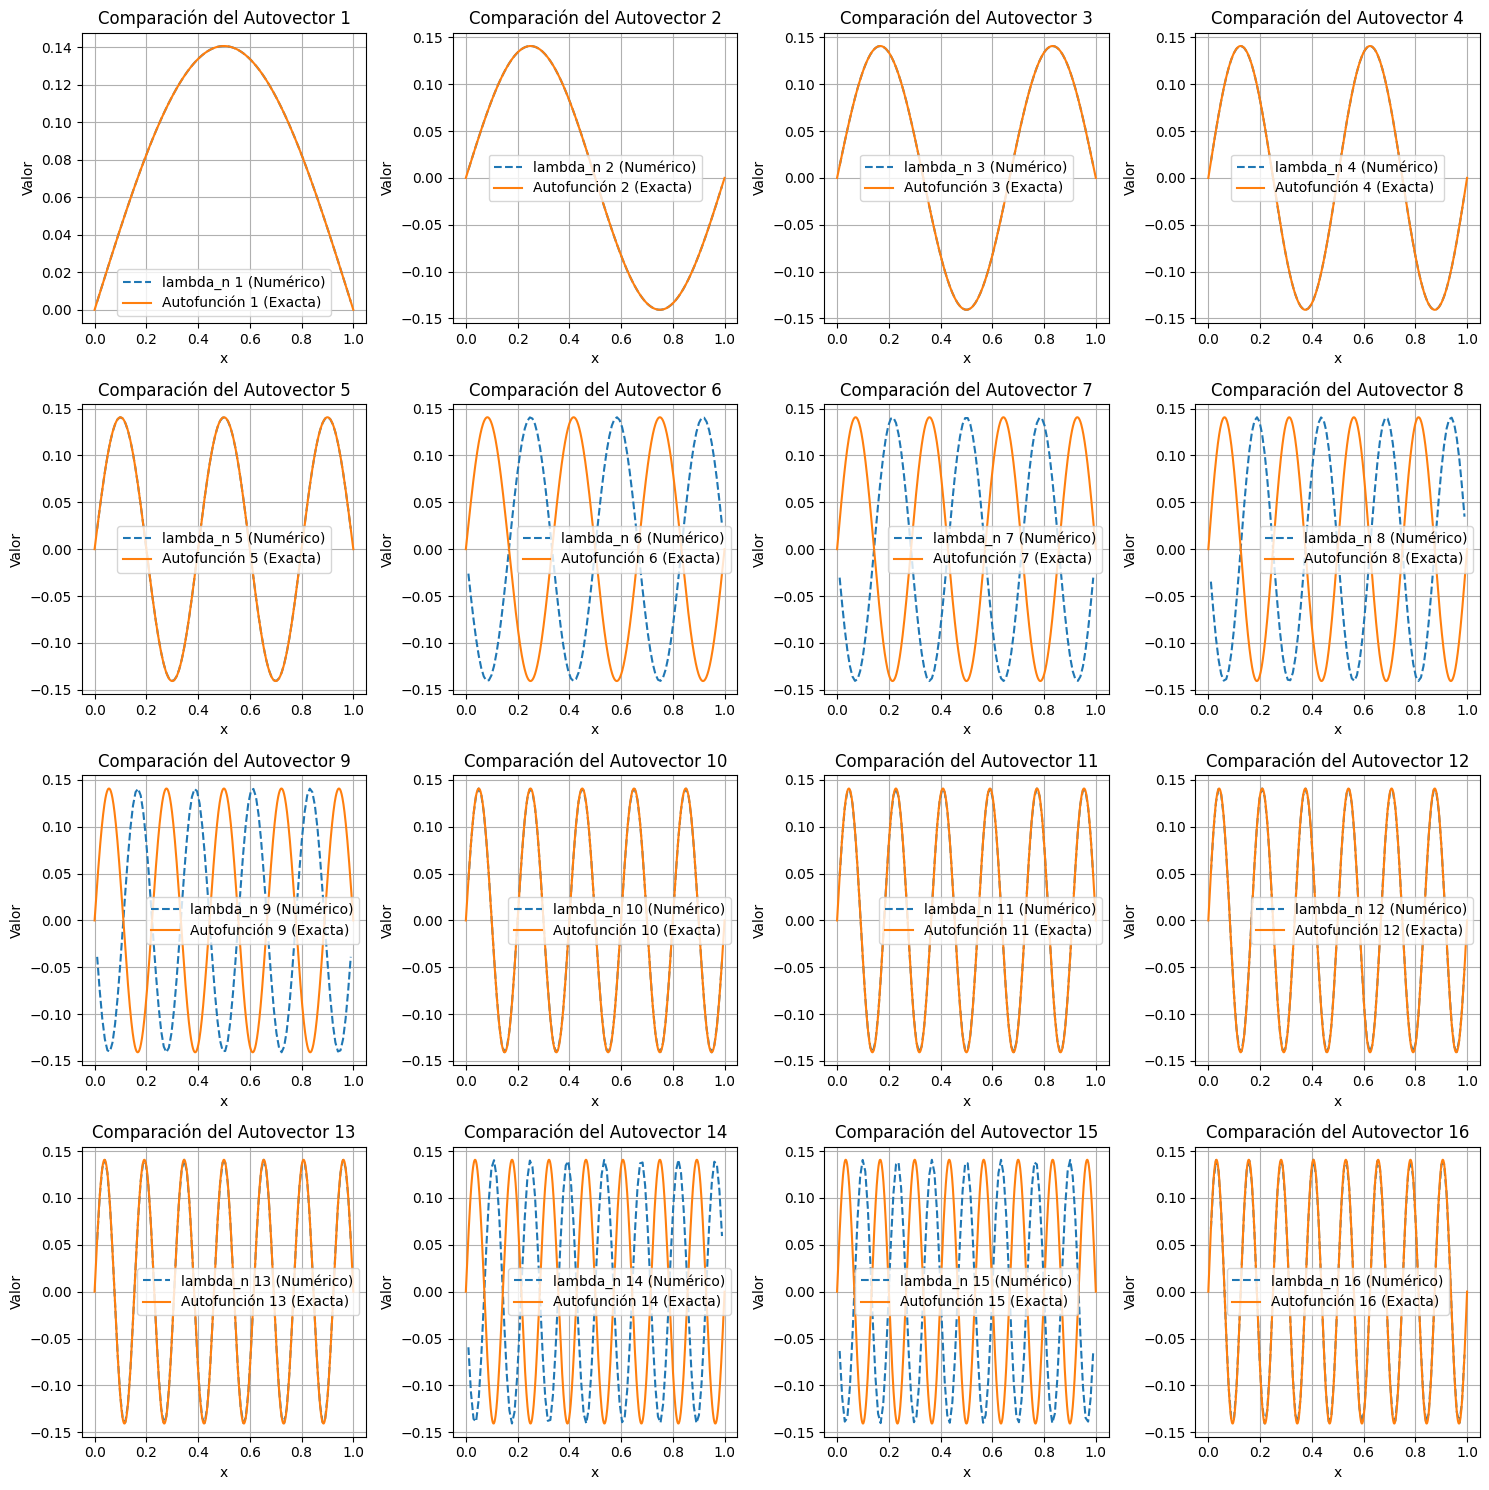

In [31]:
# Graficar los autovectores y compararlos con la solución exacta
plt.figure(figsize=(15, 15))
xint = x[1:-1]  # Puntos internos
x_exacta = np.linspace(0, 1, 1000)

for i in range(16):  # Graficar los primeros 16 autovectores
    uexact = u_autofuncion(i+1, xint)
    norma = np.linalg.norm(uexact)
#     unorm = uexact/norma
    plt.subplot(4, 4, i+1)
    plt.plot(xint, u_n[:, -1-i], label=f"lambda_n {i+1} (Numérico)", linestyle='--')
    plt.plot(x_exacta, u_autofuncion(i+1, x_exacta)/norma, label=f"Autofunción {i+1} (Exacta)")
    plt.title(f"Comparación del Autovector {i+1}")
    plt.xlabel("x")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()


## Ejemplo 2: no estable

Considere $p = 100$, $q=x$, y $r = \pi^{2}\sin(\pi x) + 100\pi\cos(\pi x) + \sin(\pi x)$. Con condiciones de frontera $\alpha = \beta= 0$. 



-4.440892098500626e-16


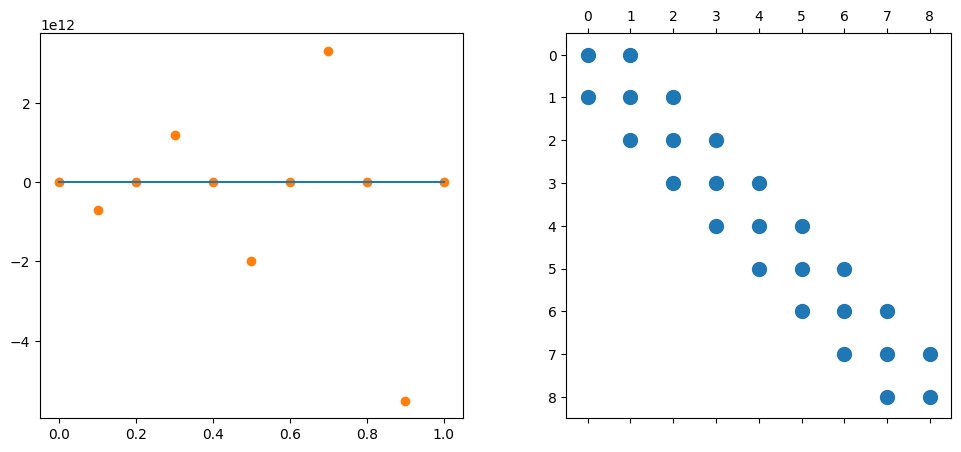

In [36]:
ufun1D = lambda x: sin(pi*x)
g1D = lambda x: ufun1D(x)
p = 5.0
q = -200.0
f1D = lambda x: (pi)**2*sin(pi*x) + p*pi*cos(pi* x) + q*sin(pi*x)

nx = 10
lx = 1.0
x = np.linspace(0,lx,nx+1)
dx = lx/nx
A1D = np.diag(2.0*np.ones(nx-1)) + np.diag(-1.0*np.ones(nx-2),1)+ np.diag(-1.0*np.ones(nx-2),-1)
A1D += p*(dx/2.0)*(np.diag(1.0*np.ones(nx-2),1) - np.diag(1.0*np.ones(nx-2),-1))
A1D += q*dx**2*np.diag(np.ones(nx-1)) 
F1D = f1D(x[1:nx])
print(A1D[0,0])
uhsol = np.zeros(nx+1)
uhsol[0] = g1D(x[0])
uhsol[nx] = g1D(x[nx])
uhsol[1:nx] = np.linalg.solve(A1D,dx**2*F1D)
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[1].spy(A1D,  marker='o')
ax[0].plot(x, uhsol,color='C01', marker='o', linestyle='None')
ax[0].plot(x, ufun1D(x))
plt.show()